### Generación de datos sintéticos

In [2]:
# ===============================
# 1. Generar dataset sintético
# ===============================
from sklearn.datasets import make_classification
import pandas as pd

# Creamos un dataset con 1000 muestras, 10 features, 2 clases
X, y = make_classification(
    n_samples=1000,     # filas
    n_features=10,      # columnas totales
    n_informative=5,    # columnas realmente útiles
    n_redundant=2,      # columnas redundantes
    n_classes=2,        # clasificación binaria
    weights=[0.7, 0.3], # desbalanceo de clases
    random_state=42
)

# Opcional: convertir a DataFrame para verlo más claro
feature_names = [f"feature_{i}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y

df.head()
#print("\nDistribución de clases:\n", df["target"].value_counts(normalize=True))

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,1.125100,1.178124,0.493516,0.790880,-0.614278,1.347020,1.419515,1.357325,0.966041,-1.981139,1
1,-0.564641,3.638629,-1.522415,-1.541705,1.616697,4.781310,3.190292,-0.890254,1.438826,-3.828748,0
2,0.516313,2.165426,-0.628486,-0.386923,0.492518,1.442381,1.332905,-1.958175,-0.348803,-1.804124,0
3,0.537282,0.966618,-0.115420,0.670755,-0.958516,0.871440,0.508186,-1.034471,-1.654176,-1.910503,1
4,0.278385,1.065828,-1.724917,-2.235667,0.715107,0.731249,-0.674119,0.598330,-0.524283,1.047610,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  1000 non-null   float64
 1   feature_1  1000 non-null   float64
 2   feature_2  1000 non-null   float64
 3   feature_3  1000 non-null   float64
 4   feature_4  1000 non-null   float64
 5   feature_5  1000 non-null   float64
 6   feature_6  1000 non-null   float64
 7   feature_7  1000 non-null   float64
 8   feature_8  1000 non-null   float64
 9   feature_9  1000 non-null   float64
 10  target     1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


### Gráfico 2D

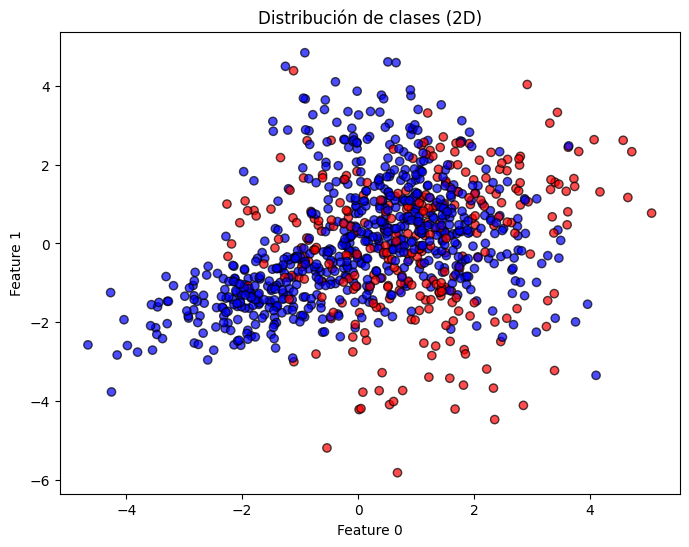

In [5]:
import matplotlib.pyplot as plt

# Tomamos dos features para graficar
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr", alpha=0.7, edgecolor="k")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Distribución de clases (2D)")
plt.show()

### Gráfico 3D

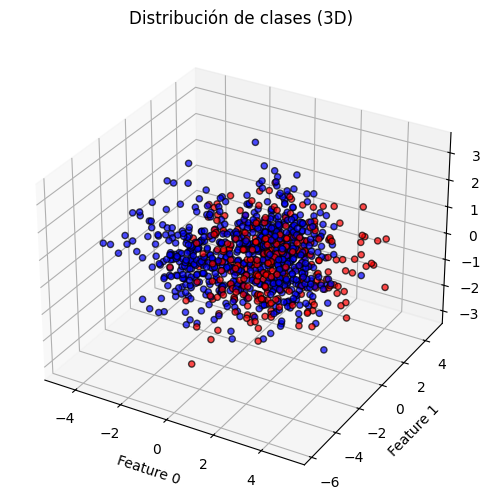

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap="bwr", alpha=0.7, edgecolor="k")

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 2")
ax.set_title("Distribución de clases (3D)")
plt.show()

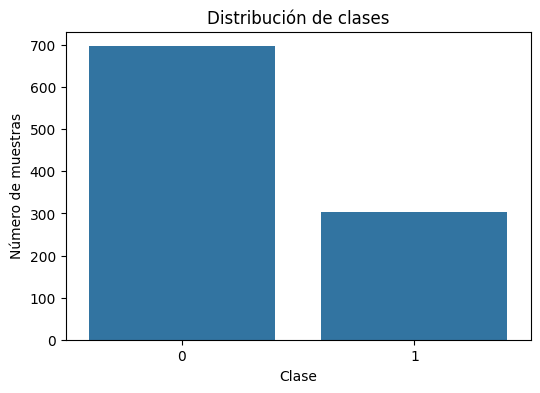

In [18]:
import seaborn as sns
import pandas as pd

# Contar los valores de cada clase
class_counts = pd.Series(y).value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel("Clase")
plt.ylabel("Número de muestras")
plt.title("Distribución de clases")
plt.show()

### Dividir conjuntos de entrenamiento y prueba

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### Normalización / Estandarización de datos
	•	Escala cada feature a media = 0 y desviación estándar = 1.
	•	Evita que features con valores grandes dominen sobre otras (ej. una variable en miles y otra en décimas).

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Entrenamiento del modelo

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Matríz de confusión

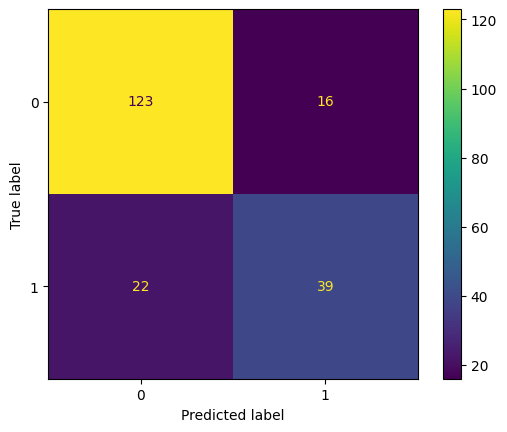

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

### Otras métricas

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       139
           1       0.71      0.64      0.67        61

    accuracy                           0.81       200
   macro avg       0.78      0.76      0.77       200
weighted avg       0.81      0.81      0.81       200



### Curva ROC AUC
	•	ROC muestra el trade-off entre falsos positivos y verdaderos positivos.
	•	El AUC (Área bajo la curva) mide la capacidad de separación de clases:
	•	0.5 = modelo aleatorio.
	•	1.0 = modelo perfecto.

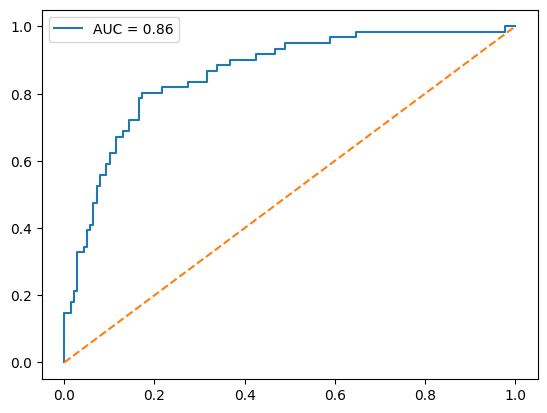

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.legend()
plt.show()

### Balanceo de clases

Opción A: Ponderar clases en el modelo

In [ ]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)

Opción B: Oversampling con SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

### Validación cruzada

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring="f1_macro")
print("F1 promedio:", scores.mean())

### Regularización y tuning de hiperparámetros

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.1, 1, 10], "penalty": ["l2"]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring="f1_macro")
grid.fit(X_train, y_train)
print("Mejores parámetros:", grid.best_params_)

### Feature importance / interpretabilidad

In [ ]:
import pandas as pd
import numpy as np

importance = np.abs(grid.best_estimator_.coef_[0])
features = pd.DataFrame({"feature": feature_names, "importance": importance})
print(features.sort_values("importance", ascending=False))

##Resumen interpretativo


*   **Train/test split** → evita sobreajuste.
*   **Scaler** → mantiene variables comparables.
*   **Matriz de confusión** → muestra dónde se equivoca el modelo.
*   **Precision/Recall/F1** → dan una visión más completa que accuracy.
*   **ROC/AUC** → mide qué tan bien separa el modelo las clases.
*   **Balanceo** (class_weight/SMOTE) → mejora la detección de la clase minoritaria.
*   **Validación cruzada** → asegura estabilidad.
*   **GridSearch** → encuentra la mejor configuración.
*   **Feature importance** → ayuda a interpretar el modelo.